![](http://pic1.tsingdataedu.com/%E9%87%8F%E5%8C%96banner.jpg)

# 利用PCA使多个因子降维和去除共线性
#### 《AI量化交易》课程案例 by @Alan 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
y = data.target
X = data.data
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

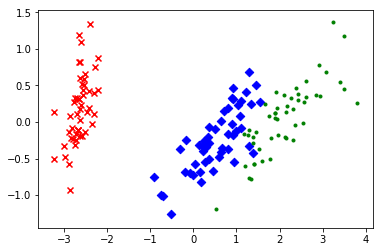

In [4]:
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


In [2]:
## 10个因子，20只股票的数据
data = pd.read_pickle('./data/data.pkl')
data

,amt,close_adj,free_float_cap,high_adj,low_adj,open_adj,pe_ttm,s_val_pb_new,volume,vwap_adj
000001.SZ,708001.802,1101.920280,7.762497e+10,1104.080908,1085.715570,1092.197454,7.0569,0.7958,696364.55,1098.367599
000002.SZ,606994.703,3609.500400,1.403211e+11,3643.740720,3568.126680,3580.966800,9.0253,1.9949,240694.90,3597.862700
000004.SZ,3220.929,67.826491,8.468295e+08,68.436076,67.013711,67.826491,122.8454,11.0298,1932.18,67.744896
000005.SZ,117122.321,27.802800,2.477281e+09,29.934348,26.968716,26.968716,83.4508,2.3894,376948.36,28.795531
000006.SZ,38645.416,184.136956,4.639227e+09,184.479218,181.398860,182.083384,7.4896,1.2465,72307.16,182.925970
000008.SZ,95248.208,90.435282,6.529874e+09,90.435282,88.653306,89.321547,12.8967,1.6300,237609.26,89.290512
000009.SZ,53761.994,32.916633,7.795625e+09,32.916633,32.401160,32.769355,187.1584,1.8881,121099.81,32.691872
000011.SZ,32033.160,34.072514,1.421200e+09,34.247604,33.442190,33.582262,30.3630,2.0098,33109.00,33.880129
000012.SZ,25728.498,99.003723,7.073757e+09,99.241142,97.816628,98.528885,20.4627,1.3331,61914.45,98.659267
000014.SZ,27710.206,52.573347,1.300307e+09,52.627158,51.766182,52.142859,361.7140,2.6592,28548.15,52.231542


In [5]:

## 主成分
pca = PCA(n_components=5)
new_factor = pca.fit_transform(data)

new_factor = pd.DataFrame(new_factor,index=data.index)

In [6]:
new_factor

,0,1,2,3,4
000001.SZ,6.377510e+10,485942.984166,-54392.086467,56.132720,-209.499221
000002.SZ,1.264712e+11,-267580.947390,25752.104230,27.287902,140.622772
000004.SZ,-1.300303e+10,-85789.684193,-5983.331038,-195.271656,-0.051523
000005.SZ,-1.137258e+10,291062.410361,74031.002966,69.502317,368.118971
000006.SZ,-9.210636e+09,-25377.513582,7956.062376,-251.674600,142.337151
000008.SZ,-7.319989e+09,138052.322886,41383.149203,-111.247787,75.656826
000009.SZ,-6.054238e+09,9540.621741,27680.113903,-9.510281,-351.948398
000011.SZ,-1.242866e+10,-47538.092151,-15001.122936,-285.435248,13.547173
000012.SZ,-6.776106e+09,-52389.487547,22431.518913,-214.884139,-287.987735
000014.SZ,-1.254956e+10,-53006.156885,-13706.803940,45.134073,46.866296


### 版权归 © 稀牛学院 所有 保留所有权利
![](http://pic1.tsingdataedu.com/%E7%A8%80%E7%89%9B%20x%20%E7%BD%91%E6%98%93.png)